# Model Training and Evaluation

In this notebook, we will train a Logistic Regression model for text classification using the dataset of fake and real news articles. We will also evaluate the model's performance on a test dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
import os
import sys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Data Function

We will define a function to load and preprocess the data.


In [3]:
def load_data(file_path):
    if not os.path.isfile(file_path):
        print(f"Error: File '{file_path}' not found.")
        return None, None

    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return None, None

    df = df.dropna()

    if 'text' not in df.columns or 'label' not in df.columns:
        print("Error: Required columns 'text' and 'label' not found in the dataset.")
        return None, None

    return df['text'], df['label']


## Load the Dataset

Next, we will load the dataset using the function defined above. Adjust the path according to your setup.


In [6]:
data_path = '..data/processed/processed_data.csv'
X, y = load_data(data_path)

if X is not None and y is not None:
    print("Data loaded successfully.")
else:
    print("Failed to load data.")


Data loaded successfully.


## Train the Model

We will train a Logistic Regression model using TF-IDF features.


In [7]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer and fit it to the training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(tfidf_train, y_train)

# Save the trained model and vectorizer
joblib.dump(log_reg, '../data/models/logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer, '..data/models/tfidf_vectorizer.pkl')

print("Model and vectorizer saved.")


Model and vectorizer saved.


## Evaluate the Model

Next, we will evaluate the model on the validation set.


In [8]:
# Transform the validation data using the vectorizer
tfidf_val = tfidf_vectorizer.transform(X_val)

# Make predictions
y_pred = log_reg.predict(tfidf_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred, target_names=['Fake', 'Real'])

# Output the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
labels = ['Fake', 'Real']
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(f'Confusion Matrix:\n{conf_matrix_df}')
print(f'Classification Report:\n{class_report}')


Accuracy: 98.27%
Confusion Matrix:
      Fake  Real
Fake  4612    92
Real    63  4213
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      4704
        Real       0.98      0.99      0.98      4276

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



## Visualize the Confusion Matrix

To better understand the model's performance, we will visualize the confusion matrix.


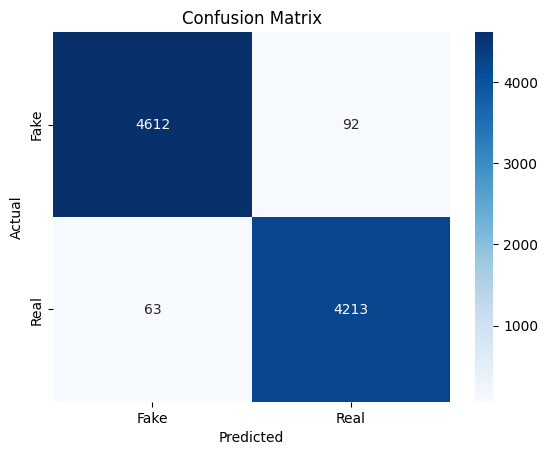

In [9]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
